/tmp/ipython-input-2-3257585488.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2-3257585488.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df['Close'].resample('M').mean()


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  108
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -346.017
Date:                Fri, 25 Jul 2025   AIC                            704.035
Time:                        16:19:05   BIC                            720.072
Sample:                    01-31-2015   HQIC                           710.536
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2689      0.089      3.027      0.002       0.095       0.443
ar.L2         -0.1363      0.091     -1.491      0.136      -0.316       0.043
ar.L3         -0.0093      0.087     -0.107      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


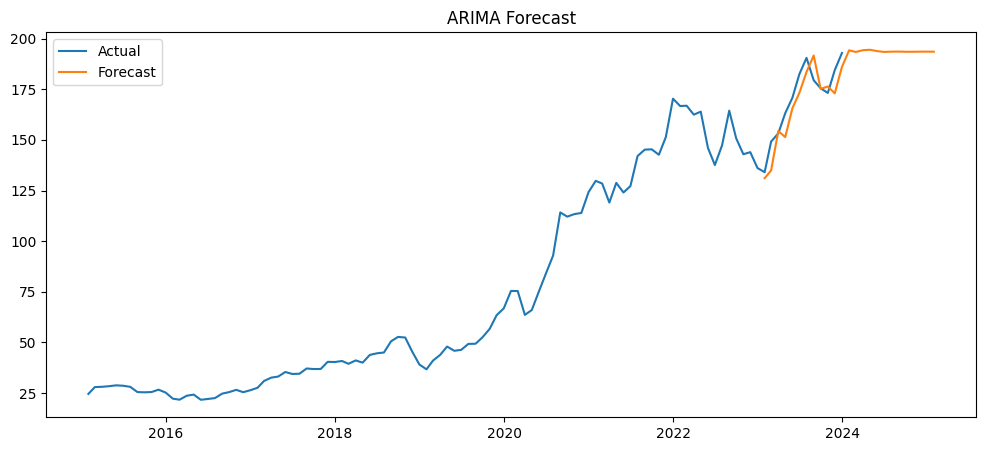

                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -316.456
Date:                            Fri, 25 Jul 2025   AIC                            642.911
Time:                                    16:19:06   BIC                            655.681
Sample:                                01-31-2015   HQIC                           648.071
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1346      0.302     -0.446      0.655      -0.726       0.457
ma.L1          0.4383      0.280   

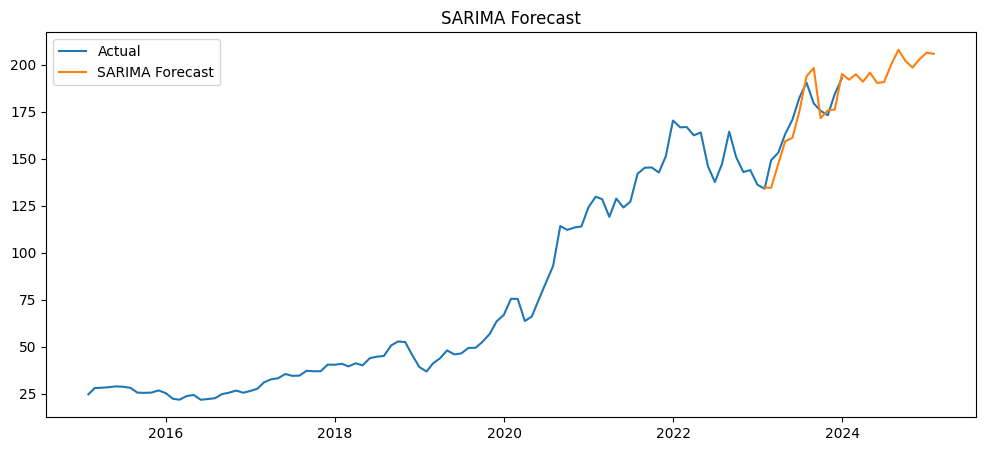

RMSE: 8.529602574385246


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf
import math

# Load data
df = yf.download('AAPL', start='2015-01-01', end='2023-12-31')
df = df['Close'].resample('M').mean()

# Differencing
df_diff = df.diff().dropna()

# ARIMA Model
model_arima = ARIMA(df, order=(5,1,0))
results_arima = model_arima.fit()
print(results_arima.summary())

# Forecast
forecast_arima = results_arima.predict(start=len(df)-12, end=len(df)+12, typ='levels')

plt.figure(figsize=(12,5))
plt.plot(df, label='Actual')
plt.plot(forecast_arima, label='Forecast')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# SARIMA Model
model_sarima = SARIMAX(df, order=(1,1,1), seasonal_order=(1,1,1,12))
results_sarima = model_sarima.fit()
print(results_sarima.summary())

forecast_sarima = results_sarima.predict(start=len(df)-12, end=len(df)+12)

plt.figure(figsize=(12,5))
plt.plot(df, label='Actual')
plt.plot(forecast_sarima, label='SARIMA Forecast')
plt.legend()
plt.title('SARIMA Forecast')
plt.show()

# RMSE
rmse = math.sqrt(mean_squared_error(df[-12:], forecast_sarima[:12]))
print(f'RMSE: {rmse}')


